<a href="https://colab.research.google.com/github/RaghavendraSreenivasa/Decision-Tree-Regression/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Upload the Kaggle API credentials JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghavendramudugere","key":"4ed5f6d2847d7a7fc6d12b5c16be016f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog



cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip cat-and-dog.zip -d cat-and-dog


Archive:  cat-and-dog.zip
replace cat-and-dog/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os

cat_folder = 'cat-and-dog/training_set/training_set/cats/'
dog_folder ='cat-and-dog/training_set/training_set/dogs/'

images = []
lables = []

for filename in os.listdir(cat_folder):
    if filename.endswith('.jpg'):
      img = cv2.imread(os.path.join(cat_folder, filename))
      img = cv2.resize(img, (128, 128))
      images.append(img)
      lables.append(0)

for filename in os.listdir(dog_folder):
    if filename.endswith('.jpg'):
      img = cv2.imread(os.path.join(dog_folder, filename))
      img = cv2.resize(img, (128, 128))
      images.append(img)
      lables.append(1)

In [ ]:
images = np.array(images)
lables = np.array(lables)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, lables, test_size = 0.2, random_state = 42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras. Sequential([
  layers. Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
  layers. MaxPooling2D((2, 2)), # input layers we used is 32
  layers. Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D( (2, 2)),
  layers. Flatten(),
  layers. Dense(64, activation='relu'),
  layers. Dense(2, activation='softmax')

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
History = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
161/161 [==============================] - 123s 758ms/step - loss: 20.6307 - accuracy: 0.5348 - val_loss: 0.6975 - val_accuracy: 0.5152
Epoch 2/10
161/161 [==============================] - 120s 748ms/step - loss: 0.6127 - accuracy: 0.6406 - val_loss: 0.7244 - val_accuracy: 0.5402
Epoch 3/10
161/161 [==============================] - 117s 730ms/step - loss: 0.4739 - accuracy: 0.7517 - val_loss: 1.0013 - val_accuracy: 0.5464
Epoch 4/10
161/161 [==============================] - 120s 744ms/step - loss: 0.3580 - accuracy: 0.8232 - val_loss: 1.2391 - val_accuracy: 0.5566
Epoch 5/10
161/161 [==============================] - 119s 741ms/step - loss: 0.2402 - accuracy: 0.8928 - val_loss: 1.6839 - val_accuracy: 0.5589
Epoch 6/10
161/161 [==============================] - 120s 747ms/step - loss: 0.1921 - accuracy: 0.9206 - val_loss: 1.5557 - val_accuracy: 0.5613
Epoch 7/10
161/161 [==============================] - 119s 742ms/step - loss: 0.1691 - accuracy: 0.9366 - val_loss: 2.0489 

In [ ]:
test_loss, test_acc= model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc}')

51/51 - 10s - loss: 2.4773 - accuracy: 0.5790 - 10s/epoch - 203ms/step
Test Accuracy: 0.5790131092071533


In [ ]:
sample_image = X_test[3]
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicated_label = np.argmax(predictions)

class_labels = ['cat', 'dog']
predicated_class = class_labels[predicated_label]
print(f'predicated class: {predicated_class}')

1/1 [==============================] - 0s 121ms/step
predicated class: dog


<function matplotlib.pyplot.show(close=None, block=None)>

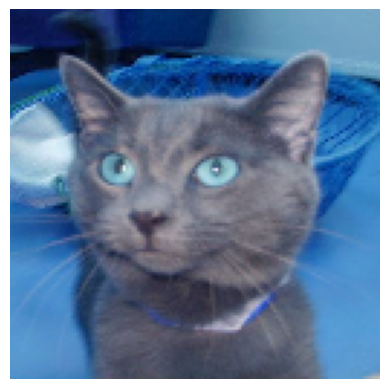

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(sample_image)
plt.axis('off')
plt.show